In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
%store -r  final_merge
%store -r orders_weekdays

In [3]:
orders_years = orders_weekdays.copy()

In [4]:
orders_years['order_year'] = orders_weekdays['order_date'].dt.year

In [5]:
orders_years.columns

Index(['order_id', 'order_date', 'state', 'region', 'ship_mode',
       'ready_to_ship_date', 'pickup_date', 'arrival_scan_date', 'order_day',
       'order_weekend', 'ship_mode_cat', 'order_year'],
      dtype='object')

In [6]:
orders_years.groupby('order_year')['region'].value_counts()

order_year  region 
2017        West       313
            East       261
            Central    230
            South      165
2018        West       338
            East       296
            Central    234
            South      170
2019        West       422
            East       374
            Central    305
            South      214
2020        West       539
            East       470
            Central    406
            South      273
Name: count, dtype: int64

In [7]:
orders_years.groupby('order_year')[['ship_mode', 'region']].value_counts()

order_year  ship_mode            region 
2017        Standard Processing  West       255
                                 East       202
                                 Central    187
                                 South      132
            Express              East        59
                                 West        58
                                 Central     43
                                 South       33
2018        Standard Processing  West       274
                                 East       233
                                 Central    190
                                 South      145
            Express              West        64
                                 East        63
                                 Central     44
                                 South       25
2019        Standard Processing  West       322
                                 East       290
                                 Central    250
                                 South      164

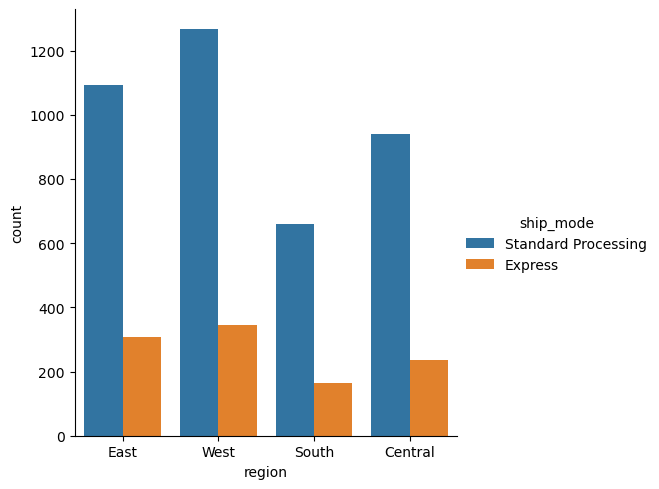

In [8]:
sns.catplot(x='region', data=orders_years, kind='count', hue='ship_mode');

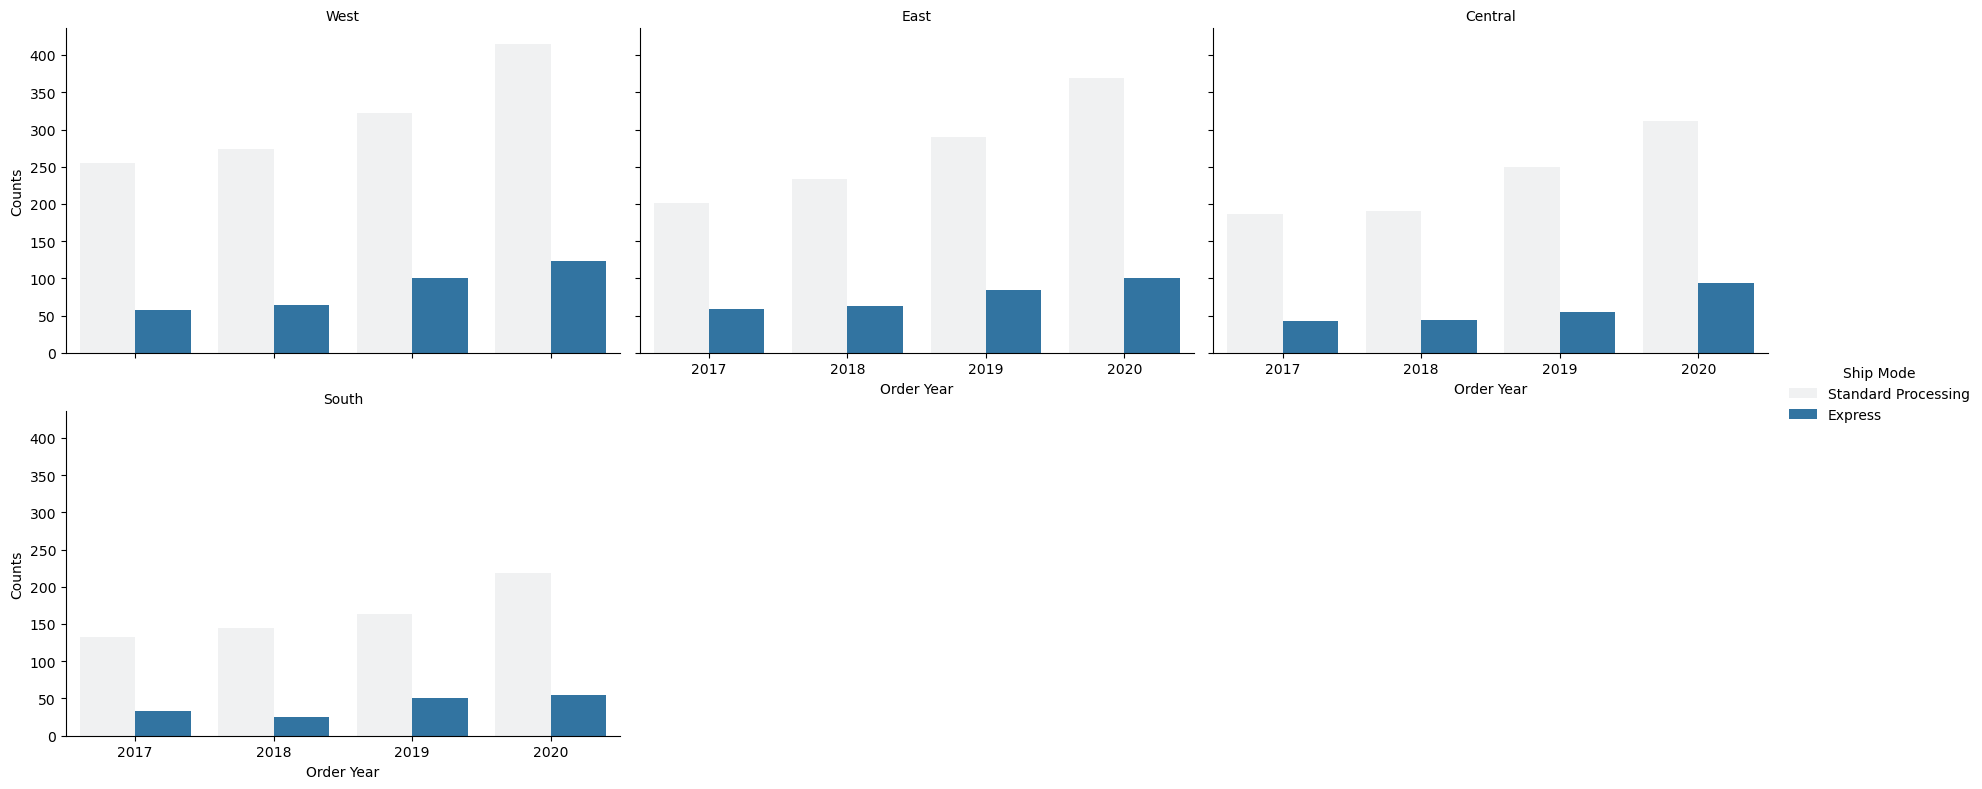

In [ ]:
# Group by order_year and get value counts for ship_mode and region
grouped_data = orders_years.groupby('order_year')[['ship_mode', 'region']].value_counts().reset_index(name='counts')

# Create a FacetGrid to plot separate graphs for each region
g = sns.FacetGrid(grouped_data, col='region', col_wrap=3, height=4, aspect=1.5)
g.map_dataframe(sns.barplot, x='order_year', y='counts', hue='ship_mode')
g.add_legend(title='Ship Mode')
g.set_axis_labels('Order Year', 'Counts')
g.set_titles(col_template='{col_name}')

plt.show()

In [9]:
orders_years.order_year.count()

5010

In [10]:
%store orders_years

Stored 'orders_years' (DataFrame)
